## Hawk-Dove Game

The <font color="lightcoral">Hawk</font>-<font color="lightgreen">Dove</font> game is a classic model in game theory that explores the dynamics of conflict and competition between individuals. It is often used to analyze situations where individuals must decide how aggressively to compete for a resource.

### Game Setup

- **Players:** Two players, Player 1 and Player 2.
- **Strategies:** Each player can choose between two strategies: <font color="lightcoral">Hawk</font> ($H$) or <font color="lightgreen">Dove</font> ($D$).
- **Payoffs:** The payoff matrix for the <font color="lightcoral">Hawk</font>-<font color="lightgreen">Dove</font> game is as follows:

$$
\begin{array}{|c|c|c|}
\hline
 & \color{lightcoral}{\text{Hawk}} (H) & \color{lightgreen}{\text{Dove}} (D) \\
\hline 
\color{lightcoral}{\text{Hawk}} (H) & \frac{V}{2} - C, \frac{V}{2} - C & V, 0 \\
\hline
\color{lightgreen}{\text{Dove}} (D) & 0, V & \frac{V}{2}, \frac{V}{2} \\
\hline
\end{array}
$$

Where:
- $V$ represents the value of the resource being contested.
- $C$ represents the cost of engaging in conflict (e.g., the energy expended or risk of injury).

### Payoff Interpretation

- If both players choose <font color="lightcoral">Hawk</font>, they engage in conflict and split the value of the resource ($V$) but incur the cost of conflict ($C$), resulting in a payoff of $\frac{V}{2} - C$ for each player.
- If one player chooses <font color="lightcoral">Hawk</font> and the other chooses <font color="lightgreen">Dove</font>, the <font color="lightcoral">Hawk</font> player wins the entire value of the resource ($V$), while the <font color="lightgreen">Dove</font> player avoids conflict and receives a payoff of $0$.
- If both players choose <font color="lightgreen">Dove</font>, they share the resource peacefully, each receiving half of its value ($\frac{V}{2}$).

### Equilibrium Analysis

The <font color="lightcoral">Hawk</font>-<font color="lightgreen">Dove</font> game has multiple Nash equilibria, depending on the values of $V$ and $C$. Some key equilibrium outcomes include:

1. **Pure Strategy Equilibria:** Pure strategy equilibria exists when both players consistently choose <font color="lightcoral">Hawk</font>. These equilibria typically occur when $\frac{V}{2} > C$.

2. **Mixed Strategy Equilibrium:** When $\frac{V}{2} < C$, there is a mixed strategy equilibrium where both players randomize between <font color="lightcoral">Hawk</font> and <font color="lightgreen">Dove</font> with certain probabilities, ensuring that neither player has an incentive to unilaterally deviate from their strategy.<br>
Lets say $P1$ plays hawk strategy with probability $p$.<br>
$$\implies EU_2(Hawk) = p * \bigg(\frac{V}{2} - C\bigg) + (1-p)*V$$ 
$$EU_2(Dove) = p * 0 + (1-p) * \frac{V}{2} = (1-p) * \frac{V}{2}$$
Equating the 2 equations : 
$$p * \bigg(\frac{V}{2} - C\bigg) + (1-p)*V = (1-p) * \frac{V}{2} = (1-p) * \frac{V}{2}$$
$$\implies p = \dfrac{V}{2C}$$
Hence Player 1 plays <font color="lightcoral">Hawk</font> with the probability $\dfrac{V}{2C}$ and <font color="lightgreen">Dove</font> with probability $1 - \dfrac{V}{2C}$

In [11]:
import numpy as np
import nashpy as nash
import matplotlib.pyplot as plt

For $V=5$ and $C=10$
$$
\begin{array}{|c|c|c|}
\hline
 & \color{lightcoral}{\text{Hawk}} (H) & \color{lightgreen}{\text{Dove}} (D) \\
\hline 
\color{lightcoral}{\text{Hawk}} (H) & -7.5, -7.5 & 5, 0 \\
\hline
\color{lightgreen}{\text{Dove}} (D) & 0, 5 & 2.5, 2.5 \\
\hline
\end{array}
$$

In [12]:
# Define the payoff matrix
V = 5
C = 10
PAYOFFS = np.array([[V/2 - C, V], [0, V/2]])
HAWKS, DOVES = 50, 50
PAYOFFS

array([[-7.5,  5. ],
       [ 0. ,  2.5]])

In [13]:
def game(rounds, hawks=HAWKS, doves=DOVES, payoff=PAYOFFS):
    #? Initialize populations
    population = hawks + doves

    #? Simulate game
    game = nash.Game(PAYOFFS, PAYOFFS.T)
    timepoints = np.linspace(0, 1, rounds)
    return game.replicator_dynamics(np.array([hawks/population, doves/population]), timepoints=timepoints)*population

In [14]:
#? Extract the populations of hawks and doves over time
def plot(game):
    hawks_population = game[:, 0]
    doves_population = game[:, 1]

    #? Calculate the total population over time
    total_population = hawks_population + doves_population

    #? Calculate the ratio of hawks and doves to the total population over time
    hawks_ratio = hawks_population / total_population
    doves_ratio = doves_population / total_population

    time = np.arange(len(hawks_ratio))

    #? Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(time, hawks_ratio)
    #plt.plot(time, doves_ratio, label='Doves')
    plt.xlabel('Time')
    plt.ylabel('Ratio to Total Population')
    plt.title('Ratio of Hawks and Doves to Total Population Over Time')
    plt.fill_between(time, hawks_ratio, color='red', alpha=0.5, label='Hawks')
    plt.fill_between(time, hawks_ratio, 1, color='green', alpha=0.5, label='Doves')
    plt.legend()
    plt.show()

[3.24819697 6.75180303]


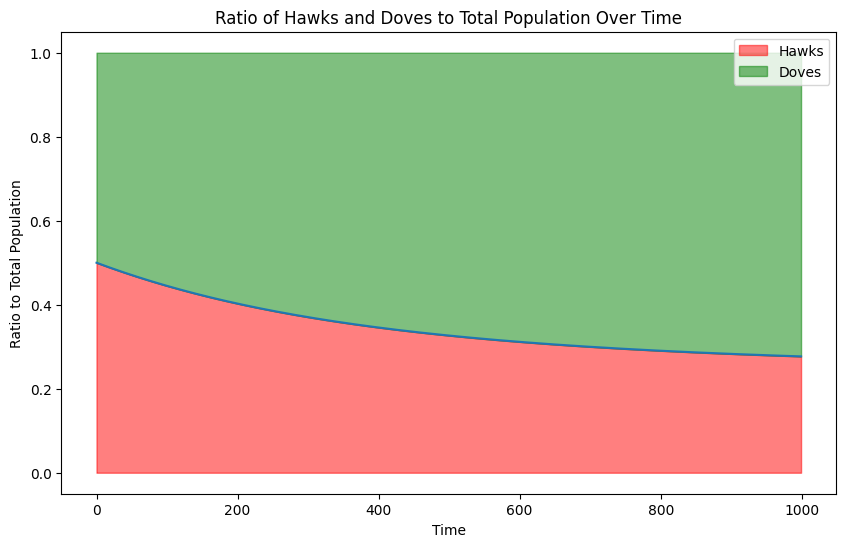

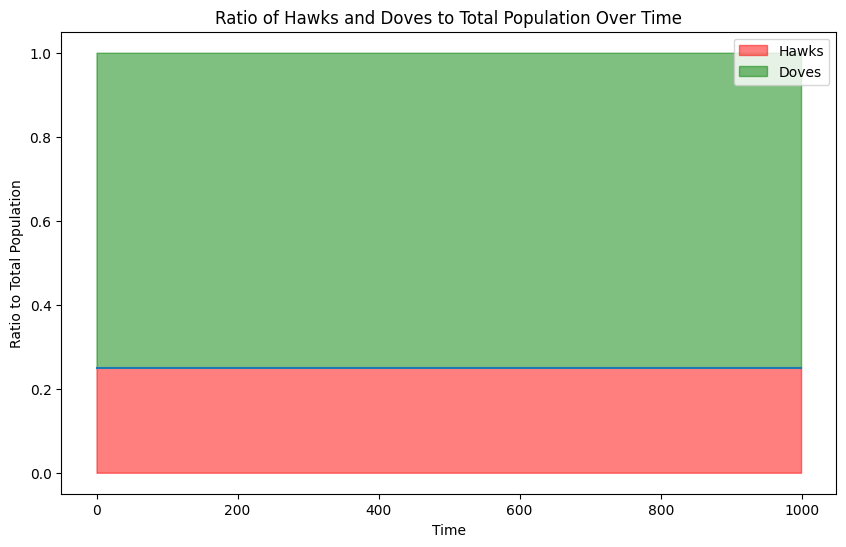

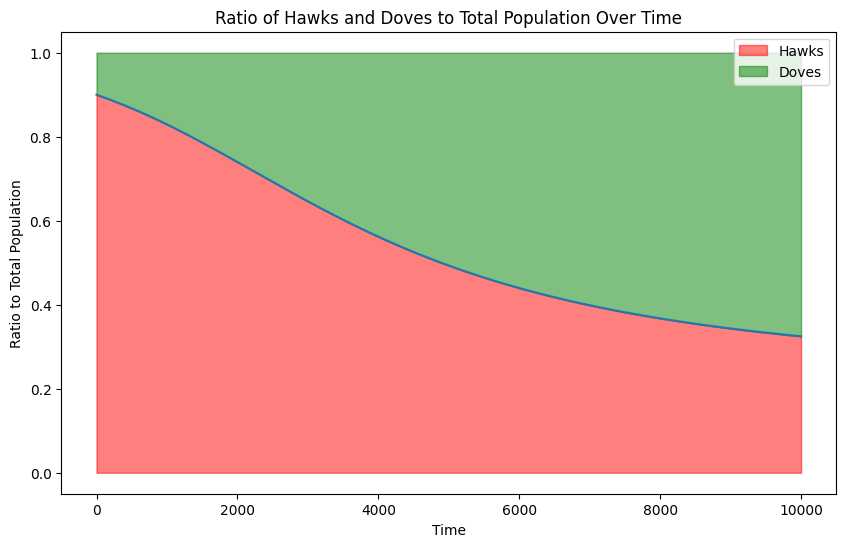

In [15]:
game1 = game(1000, hawks=50, doves=50, payoff=PAYOFFS)
game2 = game(1000, hawks=25, doves=75, payoff=PAYOFFS)
plot(game1)
plot(game2)

#### The equilibrium ratio is close to around 0.27 $\approx \frac{V}{2C} = 0.25$ which is the ESS of the game. For the 2nd case where the ratio is already 0.25, no change occurs over time.